In [1]:
from utils import read_data
from config import DATA_FILE

data = read_data(DATA_FILE)


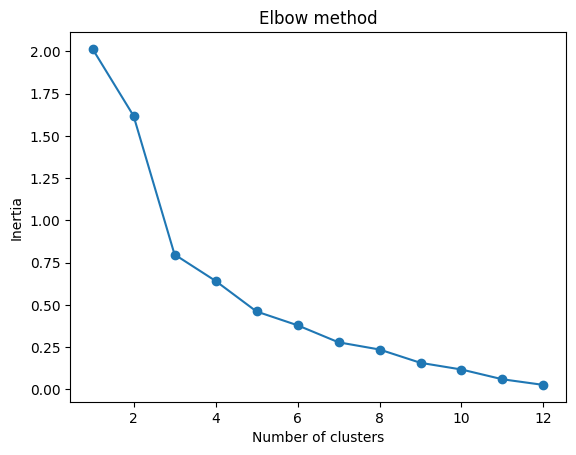

In [2]:
import matplotlib.pyplot as plt
from cluster import cluster

cluster_data = [v for _, v in data.items() if v]
inertias = cluster(cluster_data)
plt.plot(range(1,len(cluster_data)), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

In [13]:
import ipyplot
from cluster import build_clusters
from IPython.display import Image

kmean=build_clusters(cluster_data, 3)
cluster_res = kmean.predict(cluster_data)
res = list(zip([f for f in data], cluster_res))

res_dict = {}
for i,l in res:
    if l not in res_dict:
        res_dict[l] = []
    res_dict[l].append(i)
print(kmean.inertia_)
for l in res_dict:
    print(f"Label: {l}")
    ipyplot.plot_images(res_dict[l], max_images=20, img_width=100)

Label: 1


Label: 0


Label: 2
